# Exploring Relevant Data

In this project lab, we will develop skills for learning more about a social problem by exploring relevant data.  

In [ ]:
#To begin, run this cell by pressing the play button. You will need to run this cell twice.
#This code makes sure that your colab has the most recent version of packages that we will use, and loads these packages.

!pip install --upgrade pip
!pip install --upgrade Pillow
!pip install -U pandas-profiling

#Packages for profiling
from pathlib import Path
import pandas as pd
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

#Packages for working in Google Colab
from google.colab import drive
drive.mount('/content/drive')

#Packages for working with data
import numpy as np
import pandas as pd

#Packages for graphing
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


# Step 1: Load your dataset

In [3]:
# Read the dataset
df = pd.read_csv('/content/drive/My Drive/DATASCI 154 - Social Media Module/bedstuy_bikedata.csv')

In [4]:
#Print out the first few rows of your dataset
df.head()

Unnamed: 0  Trip Duration     Start Time      Stop Time  Start Station ID  \
0          37            969  1/1/2015 0:27  1/1/2015 0:43               244   
1          52            527  1/1/2015 0:32  1/1/2015 0:40               244   
2          53            486  1/1/2015 0:32  1/1/2015 0:40               244   
3          61            598  1/1/2015 0:35  1/1/2015 0:45               364   
4          62            583  1/1/2015 0:35  1/1/2015 0:45               364   

            Start Station Name  Start Station Latitude  \
0     Willoughby Ave & Hall St               40.691960   
1     Willoughby Ave & Hall St               40.691960   
2     Willoughby Ave & Hall St               40.691960   
3  Lafayette Ave & Classon Ave               40.689004   
4  Lafayette Ave & Classon Ave               40.689004   

   Start Station Longitude  End Station ID               End Station Name  \
0               -73.965369             321  Cadman Plaza E & Red Cross Pl   
1               -73.965369             261           Johnson St & Gold St   
2               -73.965369             261           Johnson St & Gold St   
3               -73.960239             437        Macon St & Nostrand Ave   
4               -73.960239             437        Macon St & Nostrand Ave   

   End Station Latitude  End Station Longitude  Bike ID   User Type  \
0             40.699918             -73.989718    16195  Subscriber   
1             40.694749             -73.983625    17898  Subscriber   
2             40.694749             -73.983625    20782  Subscriber   
3             40.680983             -73.950048    18029  Subscriber   
4             40.680983             -73.950048    16751  Subscriber   

   Birth Year  Gender  
0      1964.0       1  
1      1980.0       1  
2      1982.0       2  
3      1988.0       1  
4      1988.0       2

*Reflection Questions*

What does a row in your dataset represent? (examples: a single bike ride, a county, a person, a point in time) Do you think that you would need data at a different resolution (more or less fine grained) to do your analysis?

YOUR ANSWER HERE

# Step 2: Create a Profiling Report

Note that if your dataset is very large, this step may take awhile. For this lab, you could consider segmenting your dataset and profiling this sample. Your segment could be a random sample, or coorespond to a population of particular interest, for example a particular geographic area, age group, or time period.  

In [5]:
#Drop the time variables because they make the profiler very slow
df = df.drop(columns=['Start Time', 'Stop Time'])

In [6]:
# Generate the Profiling Report
profile = ProfileReport(
    df, title="Citi Bike Rides", html={"style": {"full_width": True}}, sort=None
)

In [7]:
# The HTML report in an iframe
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*Reflection Questions*

Which variables are most informative about your social problem?

YOUR ANSWER HERE

What values can this variable take? What is the distribution of this variable?

YOUR ANSWER HERE

Are there any interesting associations between variables in your dataset?

YOUR ANSWER HERE

If you were to use this dataset, do you think that you would need to clean any of the variables? Is there missing data?

YOUR ANSWER HERE

What else did you notice when looking at this profiling report?

YOUR ANSWER HERE

# Step 3: Additional Figures

You may wish to produce additional figures to further explore your data. Here is code that you can modify to make additional types of plots. You do not need to make all of the graphs, just those that you think would be helpful to your understanding of your data and the social problem.

*What is the distribution of the numerical variables?*

In [ ]:
#First list all the types of our data from our dataset
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [ ]:
#Here, only consider numerical variables
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Unnamed: 0  Trip Duration  Start Station ID  Start Station Latitude  \
0          37            969               244               40.691960   
1          52            527               244               40.691960   
2          53            486               244               40.691960   
3          61            598               364               40.689004   
4          62            583               364               40.689004   

   Start Station Longitude  End Station ID  End Station Latitude  \
0               -73.965369             321             40.699918   
1               -73.965369             261             40.694749   
2               -73.965369             261             40.694749   
3               -73.960239             437             40.680983   
4               -73.960239             437             40.680983   

   End Station Longitude  Bike ID  Birth Year  Gender  
0             -73.989718    16195      1964.0       1  
1             -73.983625    17898      1980.0       1  
2             -73.983625    20782      1982.0       2  
3             -73.950048    18029      1988.0       1  
4             -73.950048    16751      1988.0       2

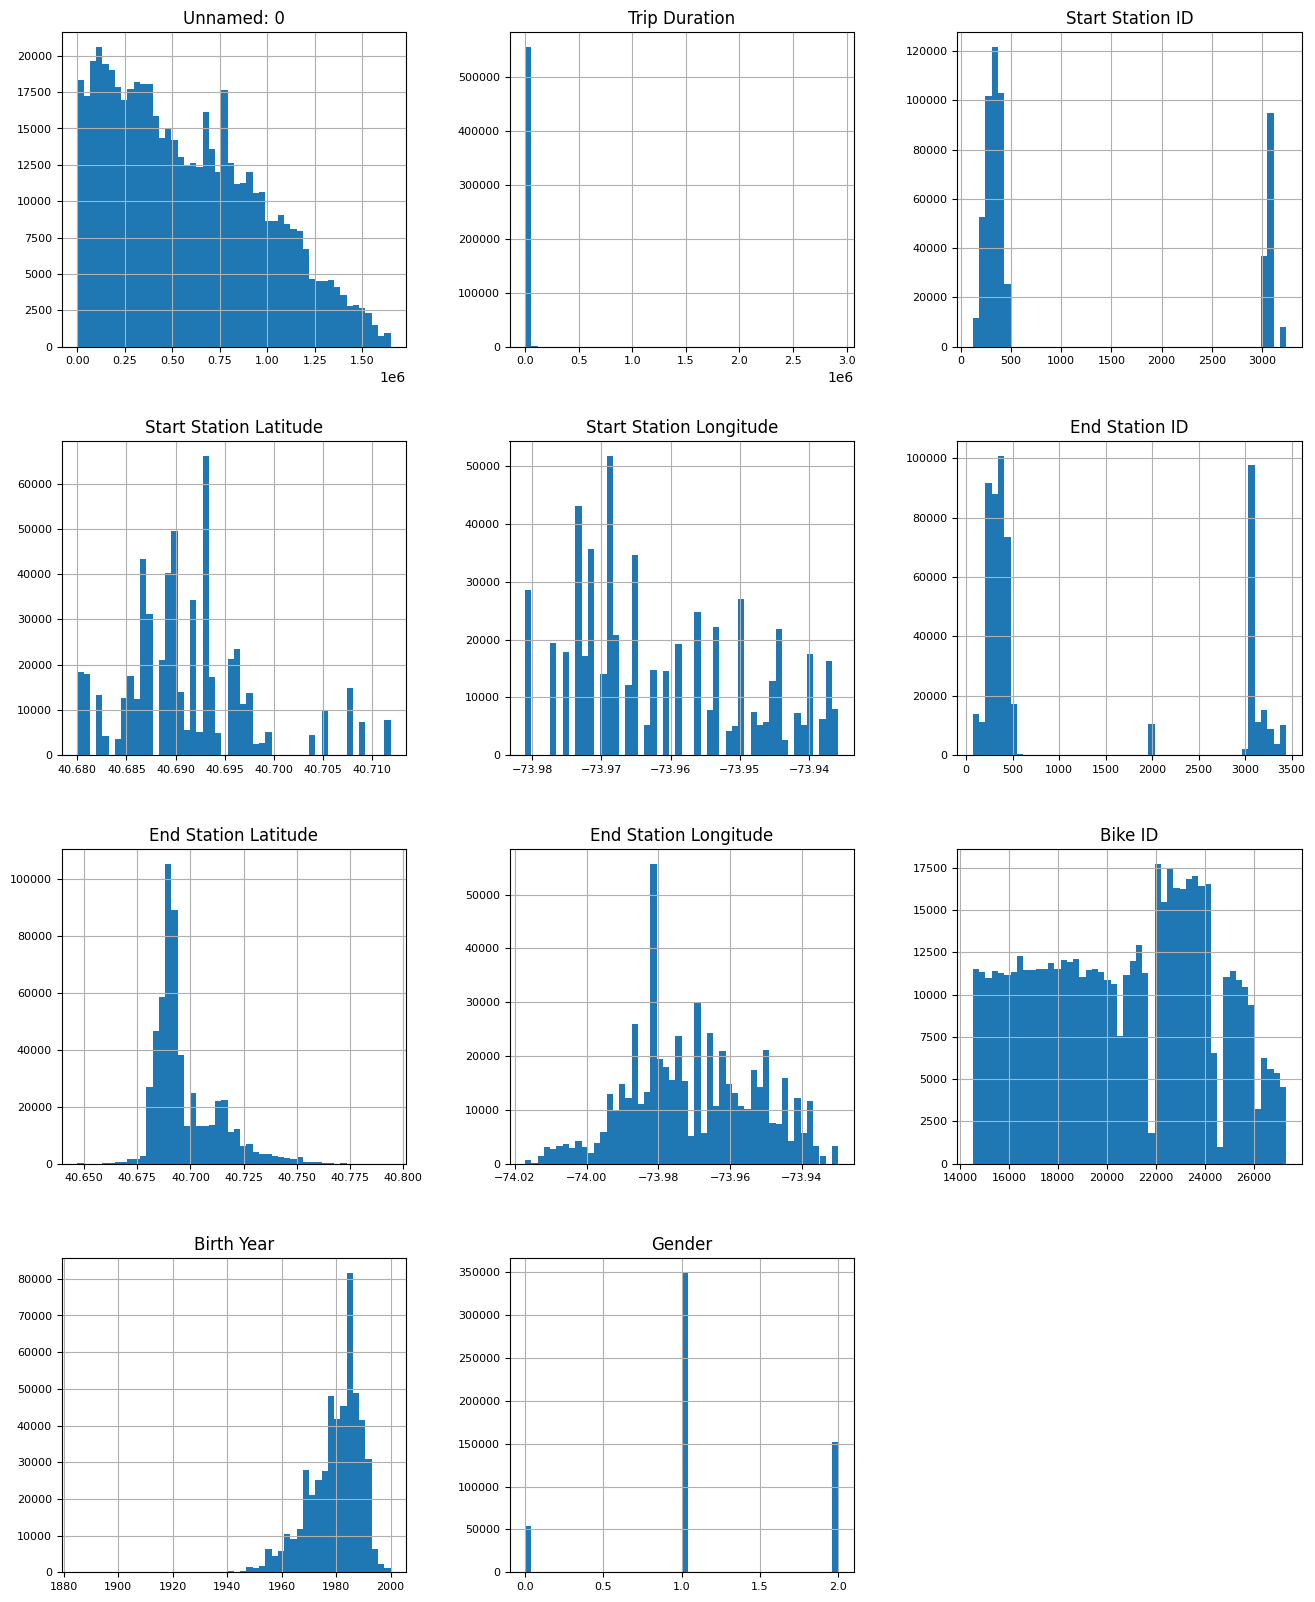

In [ ]:
#Now, plot the distribution of the numerical variables
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

*What is the distribution of the categorical variables?*

In [ ]:
#Here, only consider numerical variables
df_not_num = df.select_dtypes(include = ['O'])
#Print out the variables
df_not_num.head()

Start Time      Stop Time           Start Station Name  \
0  1/1/2015 0:27  1/1/2015 0:43     Willoughby Ave & Hall St   
1  1/1/2015 0:32  1/1/2015 0:40     Willoughby Ave & Hall St   
2  1/1/2015 0:32  1/1/2015 0:40     Willoughby Ave & Hall St   
3  1/1/2015 0:35  1/1/2015 0:45  Lafayette Ave & Classon Ave   
4  1/1/2015 0:35  1/1/2015 0:45  Lafayette Ave & Classon Ave   

                End Station Name   User Type  
0  Cadman Plaza E & Red Cross Pl  Subscriber  
1           Johnson St & Gold St  Subscriber  
2           Johnson St & Gold St  Subscriber  
3        Macon St & Nostrand Ave  Subscriber  
4        Macon St & Nostrand Ave  Subscriber

In [ ]:
#Select those variables you would like to see plotted
df_not_num = df_not_num[['Start Station Name', 'User Type']]
df_not_num.head()

Start Station Name   User Type
0     Willoughby Ave & Hall St  Subscriber
1     Willoughby Ave & Hall St  Subscriber
2     Willoughby Ave & Hall St  Subscriber
3  Lafayette Ave & Classon Ave  Subscriber
4  Lafayette Ave & Classon Ave  Subscriber

<ipython-input-24-2bd7a812760e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-24-2bd7a812760e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)


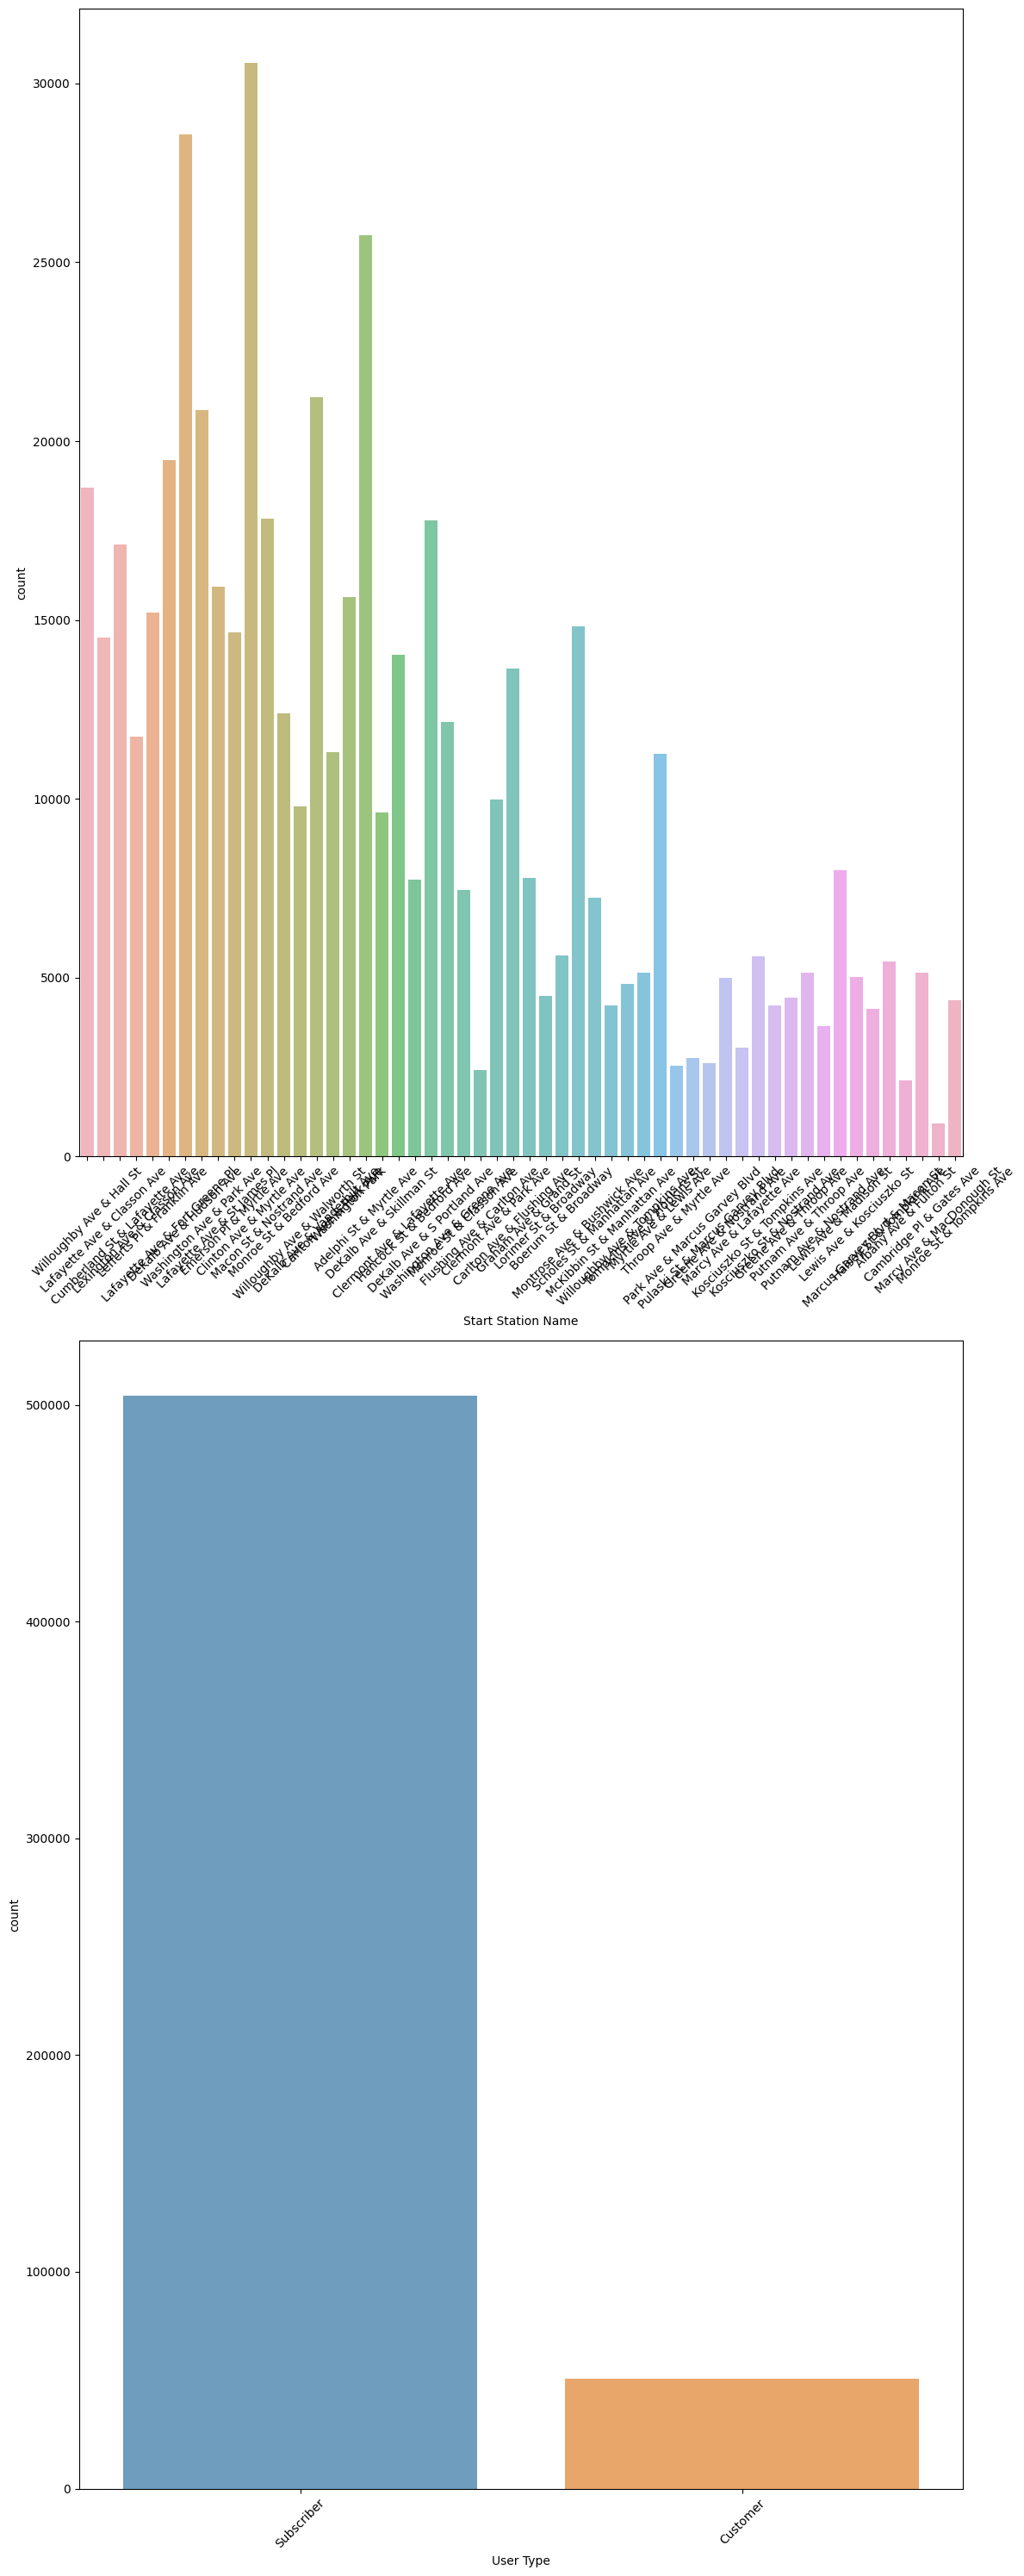

In [ ]:
#Now plot their distributions
fig, axes = plt.subplots(len(df_not_num.columns), 1, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()



*What is the correlation between the numerical variables?*

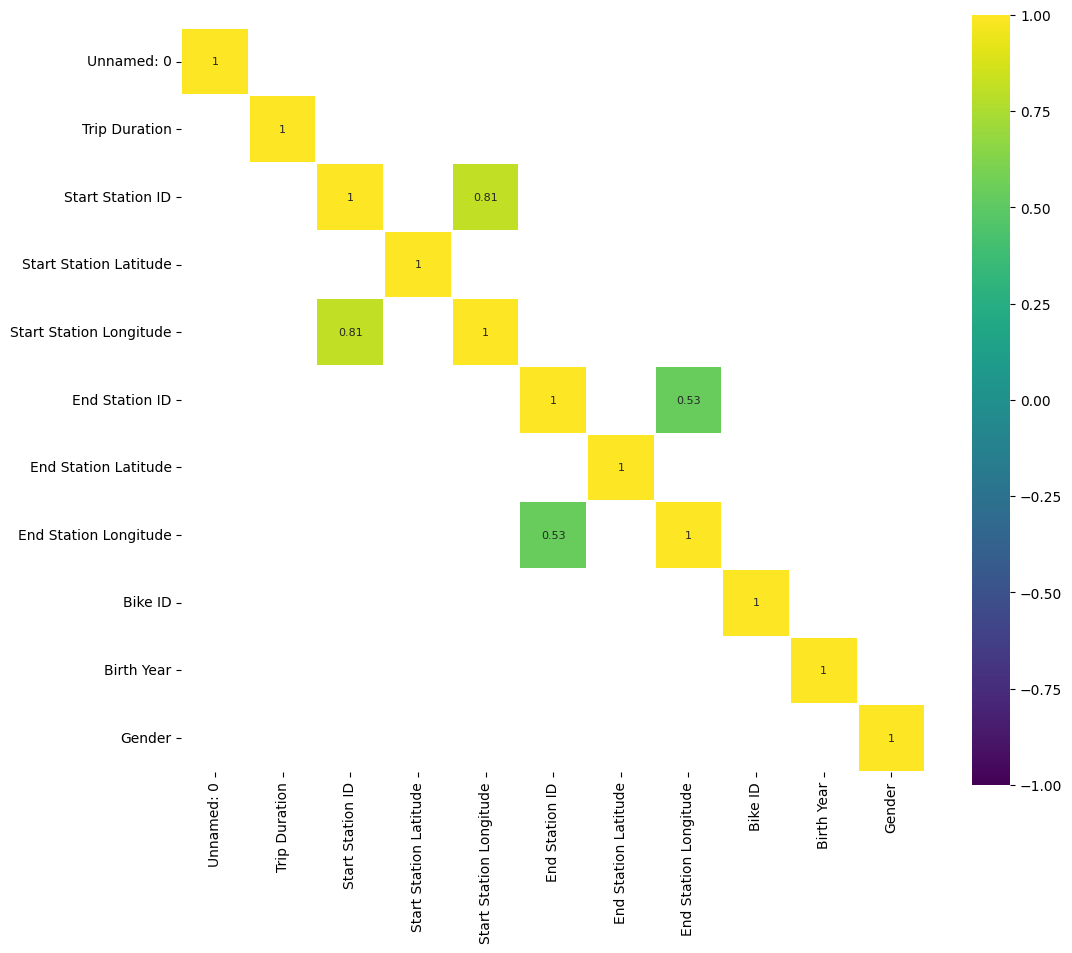

In [ ]:
#Plot a heat map of the correlation between variables
#Values towards 1 represent a strong positive correlation (i.e. they move in the same direction - if one variable is higher, the other is likely to be higher, if one variable is lower, the other is likely to be lower)
#Values towards -1 represent a strong negative correlation (i.e. the move in different directions - if one variable is higher, the other is likely to be lower)
#Values near 0 represent a weak correlation (i.e. there is no association between the variables)
corr = df_num.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

*What is the relationship between two numerical variables?*

Matplotlib is a python package that is commonly used for graphing.  Here is an example of will show how you can make a graph using matplotlib.

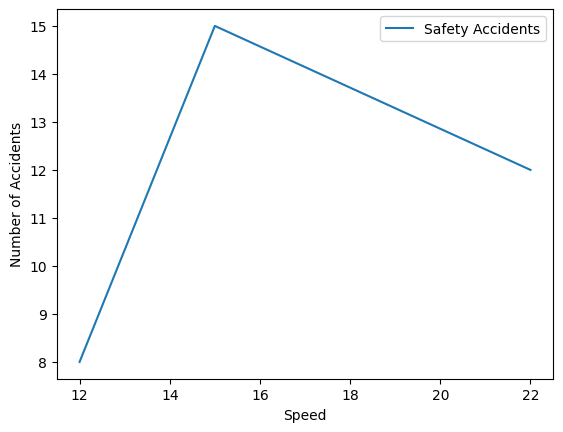

In [ ]:
#Two lists
x_values = [12, 15, 22] #speed
y_values = [8, 15, 12] #safety accidents

#Use the plot function in matplotlib to plot one line
#Can plot two lists
plt.plot(x_values, y_values, label='Safety Accidents')

# Add legend
plt.legend()

#Add axis labels
plt.xlabel('Speed')
plt.ylabel('Number of Accidents')

# Show the plot
plt.show()

*What is the relationship between time and a variable?*

This section shows how to create a time series plot. Here, we will use the seaborn package to construct graphs. Seaborn is good when you need to aggregate data to construct your graph, and also has some nice features for making your graphs visually appealing.

In [ ]:
#Convert data to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])
#Add variables to store the month, the year and the date without the time
df['Month'] = df['Start Time'].dt.month
df['Year'] = df['Start Time'].dt.year
df['Start Date'] = pd.to_datetime(df['Start Time'].dt.date)

In [ ]:
#Create a dummy variable to show that each row represents one bike ride
df['Number of Rides'] = 1

Text(0.5, 1.0, 'CitiBike Rides in Bed-Stuy')

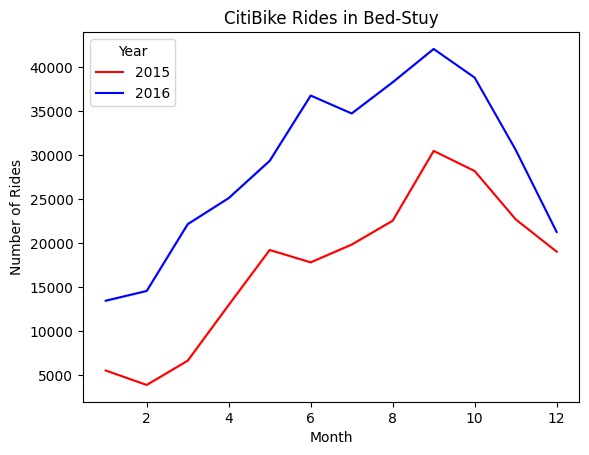

In [ ]:
#for each year, plot the total number of bike rides by month
rides_plot = sns.lineplot(data = df, x = 'Month', y = 'Number of Rides', hue = 'Year', palette = ['Red', 'Blue'], estimator = 'sum')
rides_plot.set_title("CitiBike Rides in Bed-Stuy")

Text(0.5, 1.0, 'Average Trip Duration of CitiBike Rides in Bed-Stuy')

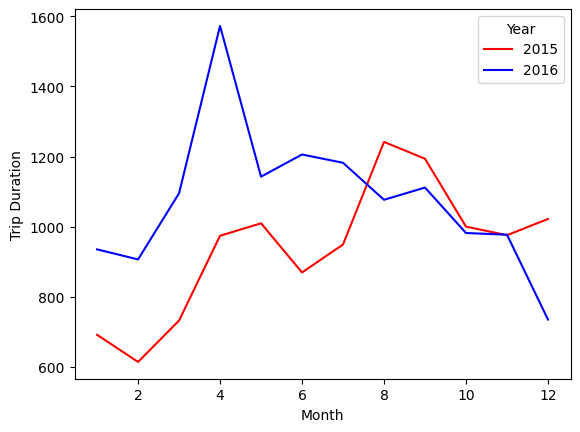

In [ ]:
#for each year, plot the average trip duration of bike rides by month
time_plot = sns.lineplot(data = df, x = 'Month', y = 'Trip Duration', hue = 'Year', palette = ['Red', 'Blue'], estimator = 'mean', errorbar = None)
rides_plot.set_title("Average Trip Duration of CitiBike Rides in Bed-Stuy")

# Step 4: Final Reflections

*What did you learn about the social problem through your analysis of the data?*

YOUR ANSWER HERE

*After looking at this initial data, what do you think is important for you to understand?*

YOUR ANSWER HERE

*What questions will you seek to address through your initial literature review in Milestone 2?*

YOUR ANSWER HERE

*What questions will you seek to understand through your initial research into lived experiences for Milestone 2? Where might you find this information?*

YOUR ANSWER HERE